<a target="_blank" href="https://colab.research.google.com/github/da-python/new-modul-python/blob/main/Lesson3/hometask/SyntheticRubber.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [61]:
# !pip install yfinance
!pip install xmltodict
!pip install compare

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for compare: filename=compare-0.2b0-py3-none-any.whl size=8634 sha256=5e17d500cd0d5796098d1a9c4b60769626f5927588c746c54df50ddc48ac9c4a
  Stored in directory: /root/.cache/pip/wheels/85/bd/3b/6ca5932e84291962c23195067db54b3f48d9672760503cacb1
Successfully built compare


In [69]:
import yfinance as yf
import pandas as pd
import requests
import xmltodict
import json
import matplotlib.pyplot as plt
import os

In [70]:
crude_oil_ticker = "CL=F"
euro_usd = 'EURUSD=X'
usd_rub = 'RUB=X'
crude_oil = yf.Ticker(crude_oil_ticker)
#hist = crude_oil.history()
Oil_price_all = yf.download(crude_oil_ticker)
euro_price_all = yf.download(euro_usd)
rub_price_all = yf.download(usd_rub)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [71]:
data = yf.download(crude_oil_ticker)

[*********************100%***********************]  1 of 1 completed


In [72]:
crude_oil_ticker = "CL=F"
exr_eurusd_ticker = "EURUSD=X"
crude_oil = yf.download(crude_oil_ticker)
#crude_oil
exr = yf.download(exr_eurusd_ticker)
exr

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0
...,...,...,...,...,...,...
2023-04-18,1.092538,1.098346,1.092275,1.092538,1.092538,0
2023-04-19,1.097538,1.098660,1.091834,1.097538,1.097538,0
2023-04-20,1.095218,1.098901,1.093434,1.095218,1.095218,0


# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Синтетический каучук" (СК), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на СК. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


* СК производиться из нефти. Один из известных способов производства предполагает, что из 10 баррелей нефти сделают одну тонну СК, а затраты на производство в районе 400 евро.

In [ ]:

# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Сonty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Ant':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'99': 0.01, # до 100 тонн 1%
             '299': 0.05, #  до 300 тонн 5%
             '300': 0.1}   # больше 300 тонн 10%


### Что нужно сделать?

1. Определить базовую формулу цены на заводе. То есть как бы выглядела цена на исторических данных. 
* Важно, чтобы цена покрывала расходы на производство и при этом была в рынке, то есть на уровне натурального каучука или с небольшим дисконтом, котировки на который можно взять с сайта http://www3.lgm.gov.my/mre/MonthlyPrices.aspx (в центах за килограм). Можно перевести в доллары за тонну.
2. Отобразить на графике.
3. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
4. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 



In [73]:
# Котировки натурального каучука доступны на сайте,  https://www.lgm.gov.my
# также у них есть API, пример запроса ниже
#
year = '2022'
month = '05'
url = f" http://www3.lgm.gov.my/mre/MonthlyPrices.aspx"
res = requests.get(url)
res


<Response [200]>

In [74]:
Oil_price = pd.DataFrame(Oil_price_all, columns = ['Close'])
euro_price = pd.DataFrame(euro_price_all, columns = ['Close'])
oil_and_euro = pd.merge(Oil_price.reset_index(), euro_price.reset_index(), on=('Date') , how='inner')

In [75]:
oil_euro_cost = oil_and_euro.assign(cost = 10*oil_and_euro['Close_x']+ 400*oil_and_euro['Close_y'])

In [76]:
oil_euro_cost_2022 = oil_euro_cost[oil_euro_cost['Date']>='2023-05-01']
oil_euro_cost_2022 = oil_euro_cost_2022[oil_euro_cost_2022['Date']<'2023-01-01']
oil_euro_cost_2022 = oil_euro_cost_2022.reset_index(drop=True)

In [77]:
rubberprice=[]
for i in range(1,13):
    if len(str(i))==1:
        i=str(i)
        i= '0'+i
    else: i=str(i)
    print(i) 
    year = '2022'
    month = i
    url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={month}&year={year}"
    res = requests.get(url)
    rj = res.json()
    df =pd.DataFrame(rj)
    rubberprice.append(df)  
rubberprice_df =pd.concat(rubberprice, axis=0)
rubberprice_df = rubberprice_df.reset_index(drop=True) 

01
02
03
04
05
06
07
08
09
10
11
12


In [78]:
rubberprice_df_cv = rubberprice_df[rubberprice_df['grade']== 'SMR CV']
rubberprice_df_cv = rubberprice_df_cv.reset_index(drop=True) 
rubberprice_df_cv['us']=rubberprice_df_cv['us'].apply(pd.to_numeric)

In [79]:
rubberprice_df_cv_new = rubberprice_df_cv.assign(USD = rubberprice_df_cv['us']*10)

In [80]:
rubberprice_df_cv_2022 = rubberprice_df_cv_new[rubberprice_df_cv_new['date']>='2022-01-01']
rubberprice_df_cv_2022 = rubberprice_df_cv_new[rubberprice_df_cv_new['date']<'2023-01-01']
rubberprice_df_cv_2022['date']=pd.to_datetime(rubberprice_df_cv_2022['date'])

In [81]:
all = pd.merge(oil_euro_cost_2022, rubberprice_df_cv_2022, left_on =('Date'), right_on =('date'),  how='inner')

In [82]:
all['compare'] = all['cost'] < all['USD']
all
#таблица не загружается ((

,Date,Close_x,Close_y,cost,date,grade,masa,rm,us,tone,USD,compare


In [83]:
all_plot = all[['Date','cost']]
all_plot = all_plot.round({'cost': 0})
all_plot_graf = all_plot.set_index('Date')['cost']

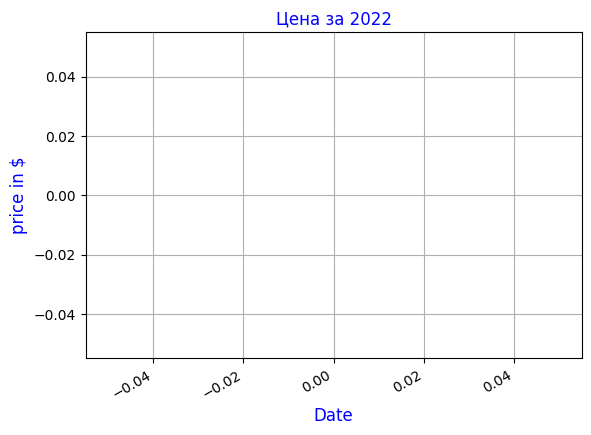

In [84]:
from pylab import rcParams
title_dict = {'fontsize':12, 
              'color':'Blue'}
plt.title('Цена за 2022', fontdict=title_dict)
plt.xlabel('Дата', fontdict=title_dict)
plt.ylabel('price in $', fontdict=title_dict)
all_plot_graf.plot()
plt.grid()
plt.show()

# Задание 2

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

# Задание 3

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать СК для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать СК с завода самостоятельно.
На основе тех данных, которые уже есть предложите цену новому клиенту в рублях. 



In [ ]:
#